# *Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

# *Reading And Describing Data*

In [ ]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.shape

(2149, 35)

In [ ]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [ ]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.drop(['DoctorInCharge','PatientID'],axis =1,inplace=True)

In [ ]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


In [ ]:
df.shape

(2149, 33)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
display(df['Gender'].unique())
display(df['Ethnicity'].unique())
display(df['FamilyHistoryAlzheimers'].unique())
display(df['MemoryComplaints'].unique())
display(df['FamilyHistoryAlzheimers'].unique())

array([0, 1])

array([0, 3, 1, 2])

array([0, 1])

array([0, 1])

array([0, 1])

# *Vizualizing Data*

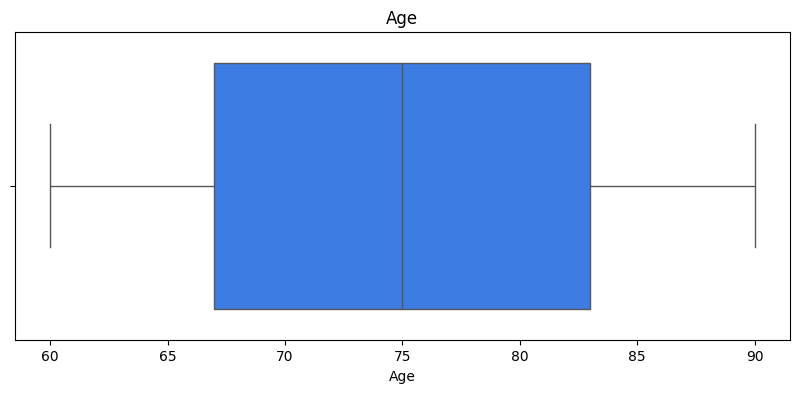

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="Age", data=df, color='#2176ff')
plt.title("Age")
plt.show()

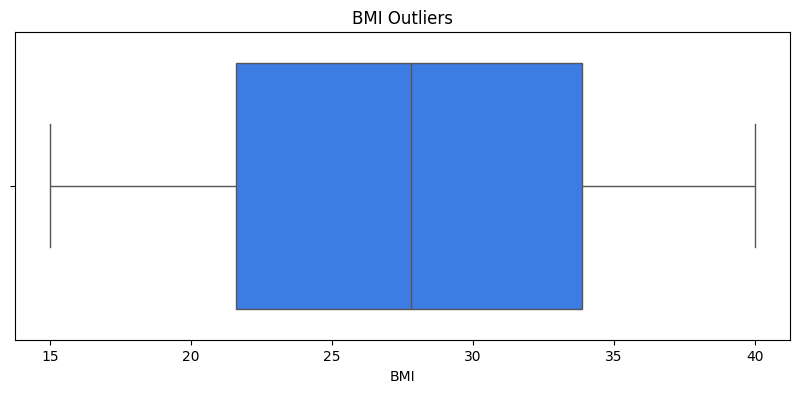

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="BMI", data=df, color='#2176ff')
plt.title("BMI Outliers")
plt.show()

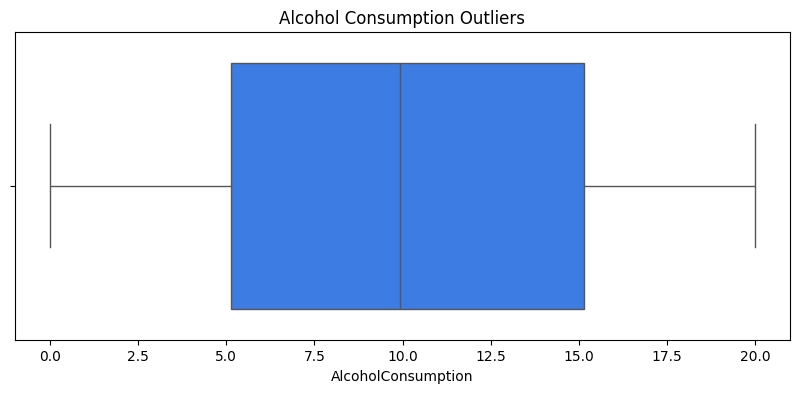

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="AlcoholConsumption", data=df, color='#2176ff')
plt.title("Alcohol Consumption Outliers")
plt.show()

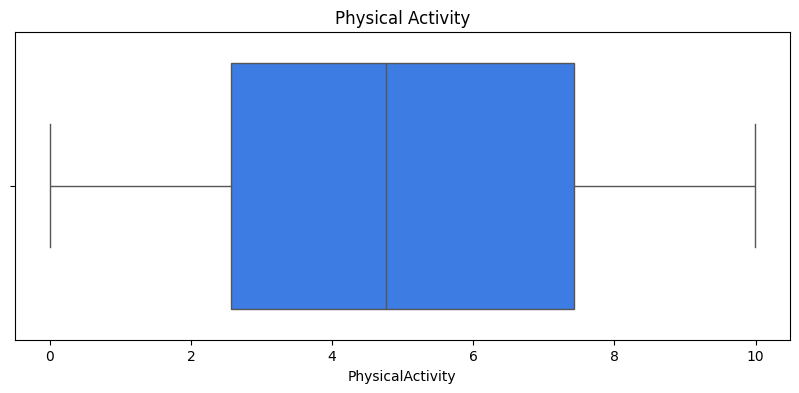

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="PhysicalActivity", data=df, color='#2176ff')
plt.title("Physical Activity")
plt.show()

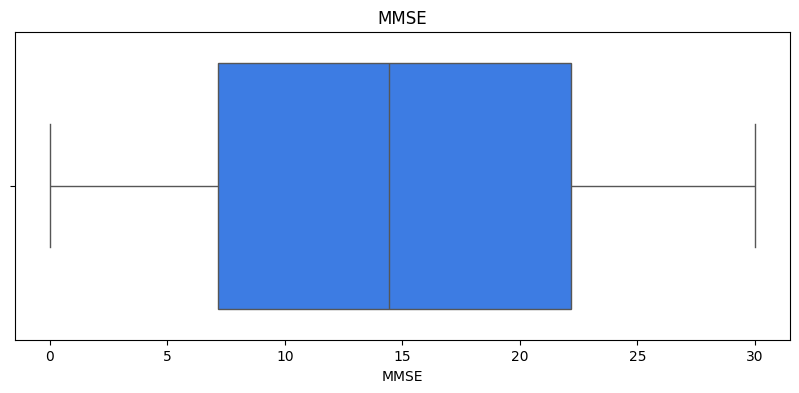

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="MMSE", data=df, color='#2176ff')
plt.title("MMSE")
plt.show()

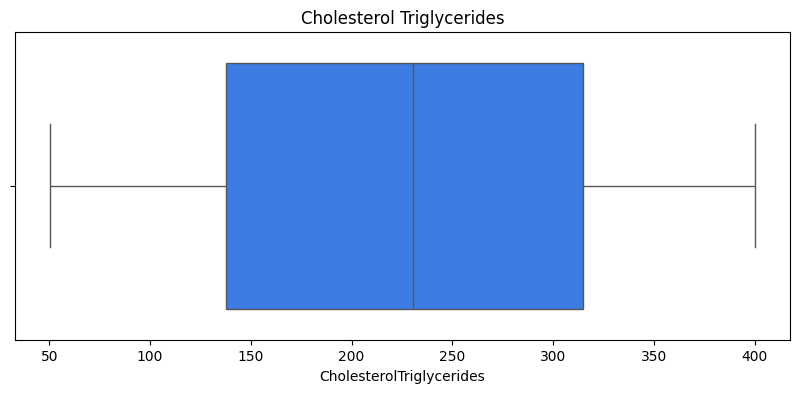

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="CholesterolTriglycerides", data=df, color='#2176ff')
plt.title("Cholesterol Triglycerides")
plt.show()

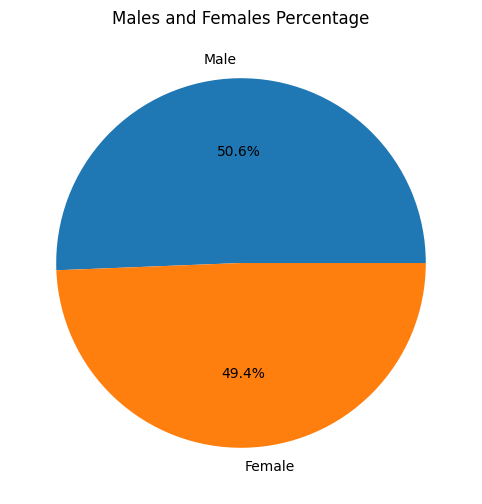

In [ ]:
label = ['Male', 'Female']
plt.figure(figsize=(8,6))
plt.pie(df['Gender'].value_counts(), labels=label, autopct='%.1f%%')
plt.title('Males and Females Percentage')
plt.show()

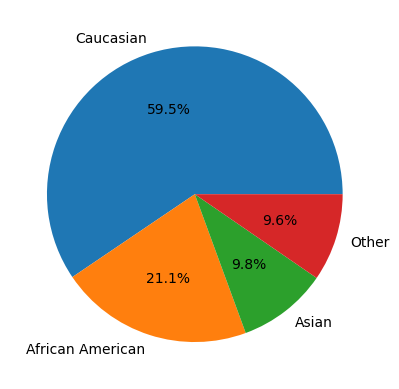

In [ ]:
label = ['Caucasian', 'African American', 'Asian', 'Other']
plt.pie(df['Ethnicity'].value_counts(),labels=label, autopct='%.1f%%')
plt.show()

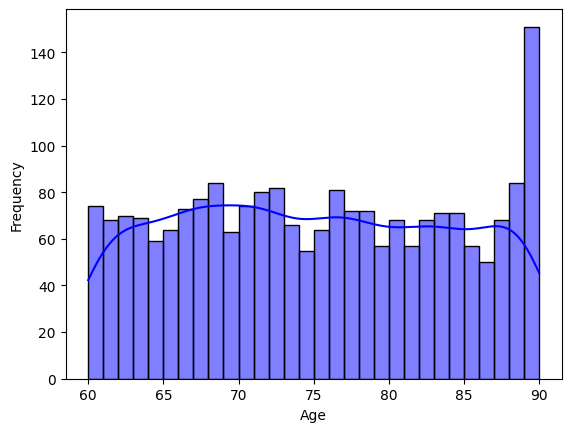

In [ ]:
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

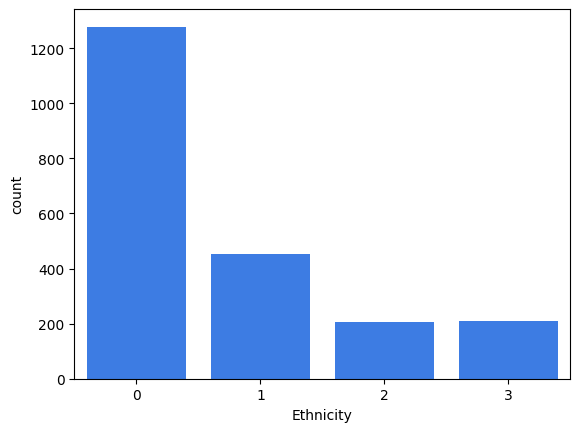

In [ ]:
sns.countplot(x='Ethnicity', data=df, color='#2176ff')
plt.show()

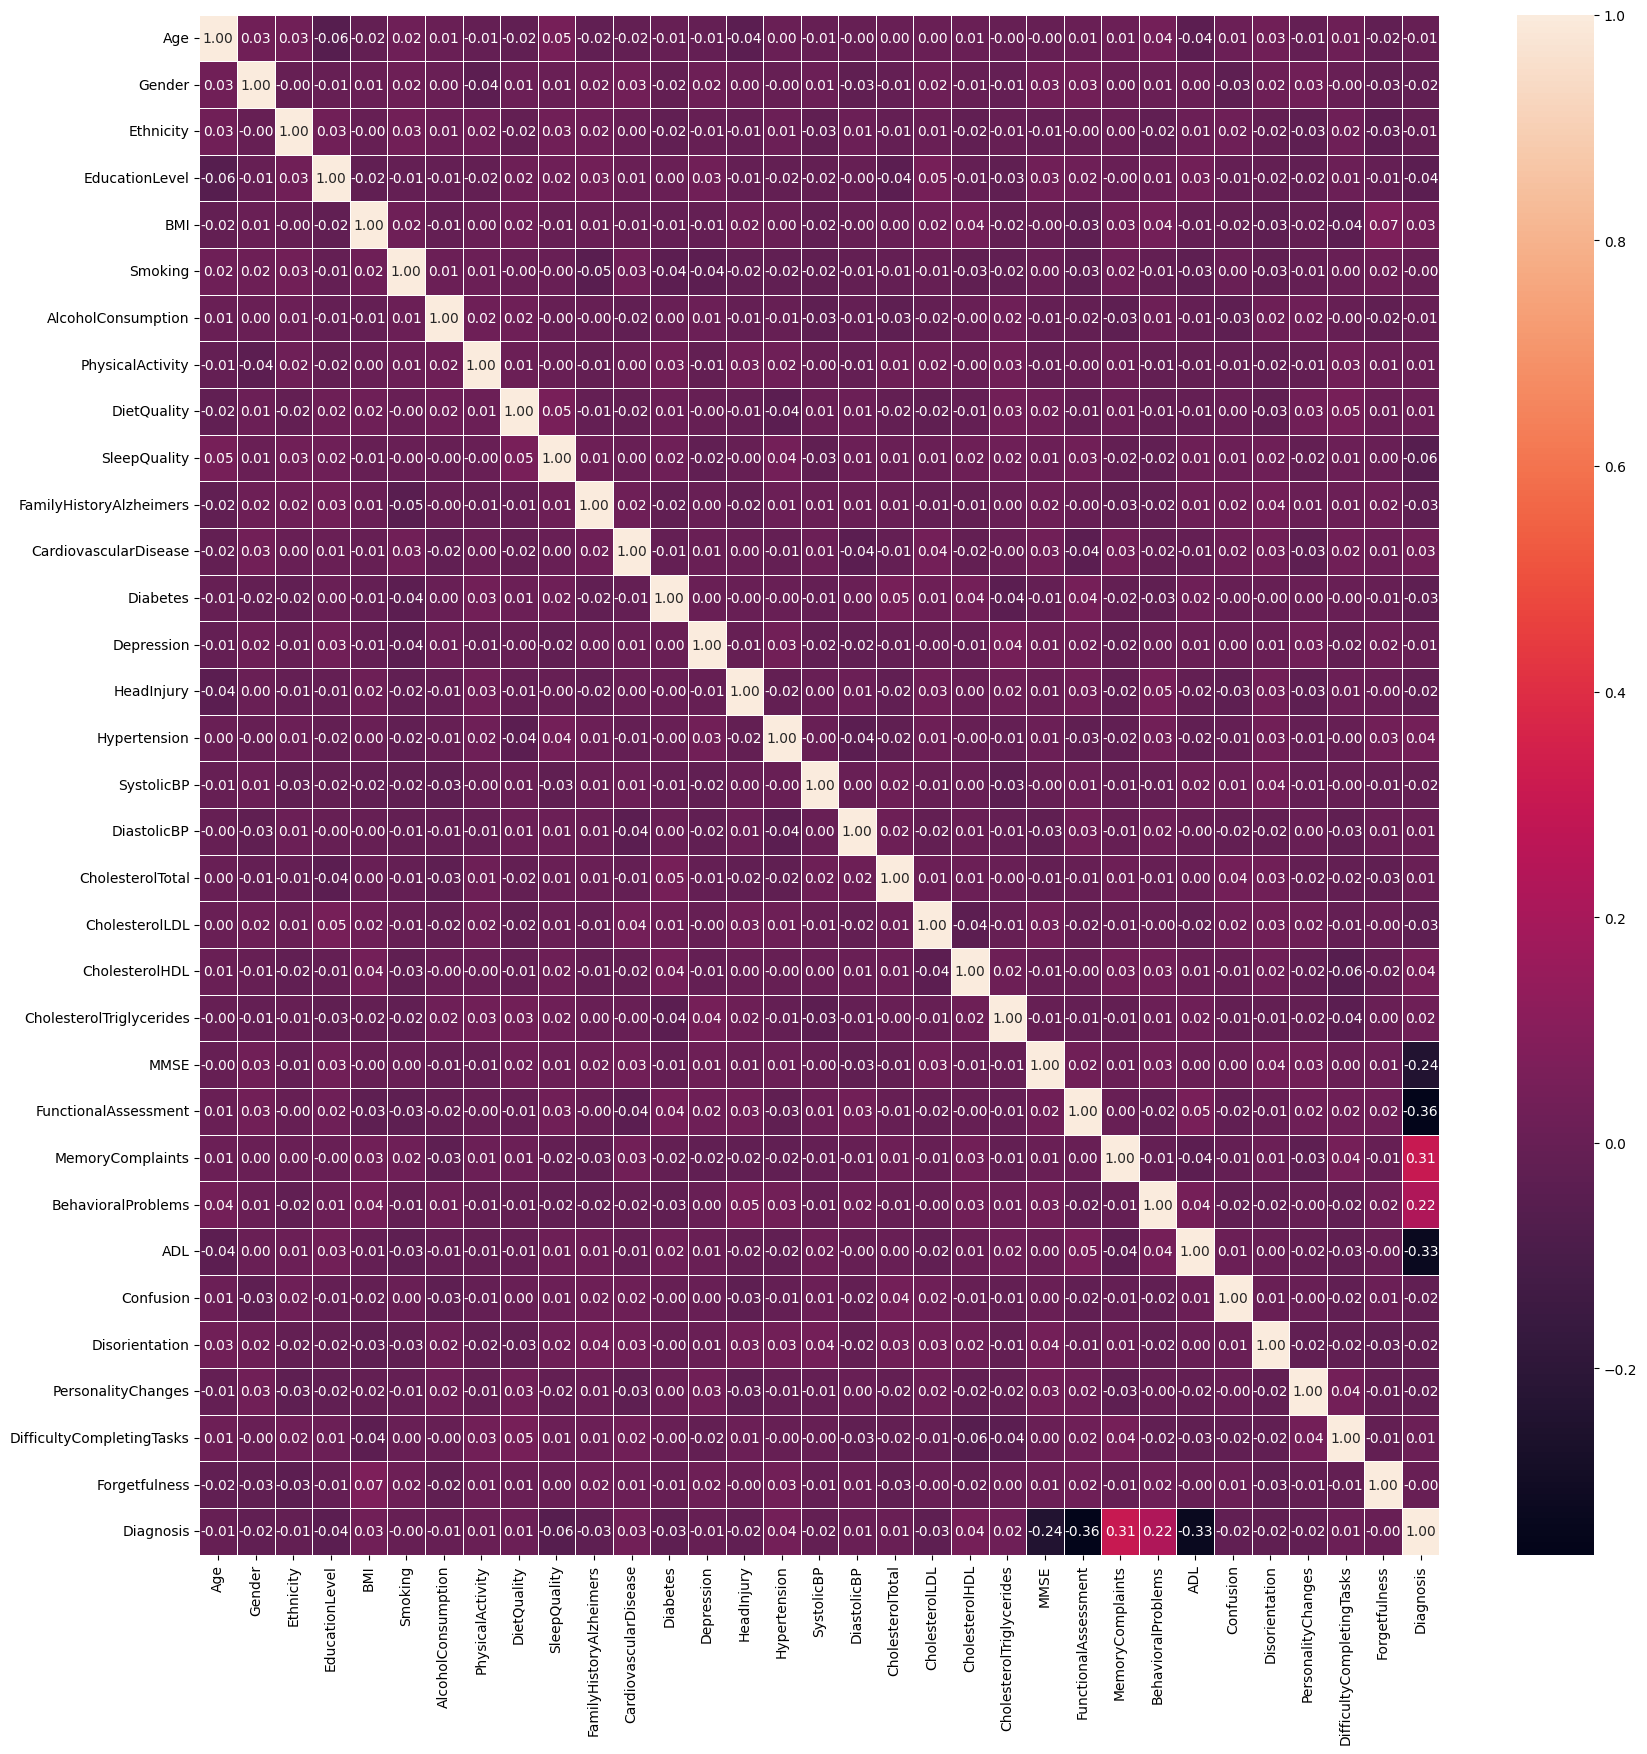

In [ ]:
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

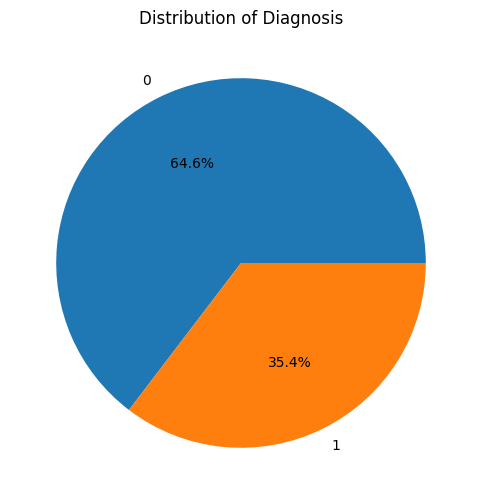

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(df['Diagnosis'].value_counts(), labels=df['Diagnosis'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Diagnosis')
plt.show()

In [ ]:
# Assuming 'Diagnosis' is your target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['Diagnosis'] = y_balanced


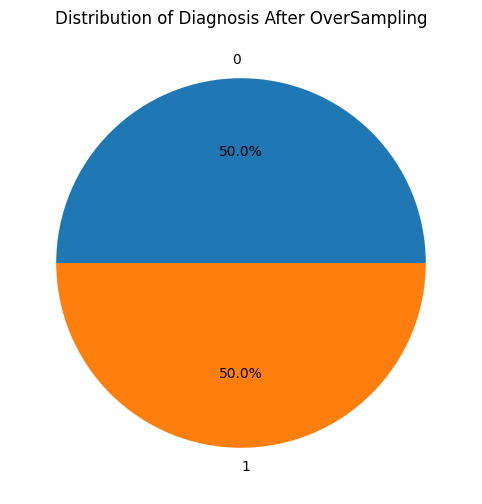

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(df_balanced['Diagnosis'].value_counts(), labels=df_balanced['Diagnosis'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Diagnosis After OverSampling')
plt.show()

# *Modeling*

In [ ]:
#balanced data split
X_balanced = df_balanced.drop('Diagnosis', axis=1)
y_balanced = df_balanced['Diagnosis']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
#unbalanced data split
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## - *XGBoost(Logistic) Model With Balanced Data*

In [ ]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1,

)

model.fit(X_train_balanced, y_train_balanced, eval_set=[(X_test_balanced, y_test_balanced)], verbose=False)

y_pred_train = model.predict(X_train_balanced)
y_pred_test = model.predict(X_test_balanced)

train_accuracy = accuracy_score(y_train_balanced, y_pred_train)
test_accuracy = accuracy_score(y_test_balanced, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Training Accuracy: 93.43 %
Test Accuracy: 89.93 %


## - *XGBoost(Logistic) Model With Unbalanced Data*

In [ ]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1,

)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Training Accuracy: 96.28 %
Test Accuracy: 95.35 %


## - *XgBoost(Softmax) Model With Balanced Data*

In [ ]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(df['Diagnosis'].unique()),
    eval_metric='merror',
    use_label_encoder=False,
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1
)

model.fit(X_train_balanced, y_train_balanced, eval_set=[(X_test_balanced, y_test_balanced)], verbose=False)

y_pred_train = model.predict(X_train_balanced)
y_pred_test = model.predict(X_test_balanced)

train_accuracy = accuracy_score(y_train_balanced, y_pred_train)
test_accuracy = accuracy_score(y_test_balanced, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Training Accuracy: 93.52 %
Test Accuracy: 89.93 %


## - *XgBoost(Softmax) Model With UnBalanced Data*

In [ ]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(df['Diagnosis'].unique()),
    eval_metric='merror',
    use_label_encoder=False,
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")


Training Accuracy: 96.34 %
Test Accuracy: 95.81 %


## - *Logistic Regression Model*

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred_train = logreg_model.predict(X_train)
y_pred_test = logreg_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")


Training Accuracy: 85.11 %
Test Accuracy: 83.02 %


In [ ]:
y_pred = logreg_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[247,  30],
       [ 43, 110]])

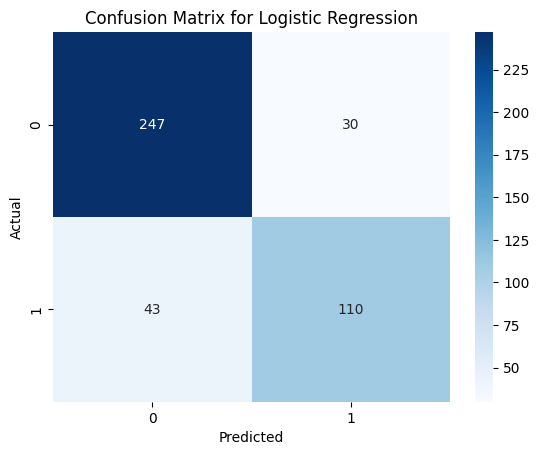

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
classificationRep = classification_report(y_test, y_pred_test)
print(classificationRep)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.79      0.72      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430



## - *Random Forest Model*

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200,300,500],
    'max_depth': [4,5,6],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")


Training Accuracy: 96.51 %
Test Accuracy: 88.37 %


## - *Decision Tree Model*

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_

y_pred_train = best_dt_model.predict(X_train)
y_pred_test = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")


Training Accuracy: 96.28 %
Test Accuracy: 91.63 %


## - *SVM*

In [ ]:
svm_poly_model = SVC(kernel='poly', degree=3, C=1)

svm_poly_model.fit(X_train, y_train)

y_pred_train = svm_poly_model.predict(X_train)
y_pred_test = svm_poly_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")


Training Accuracy: 64.69 %
Test Accuracy: 64.42 %


## - *AdaBoost Model*

In [ ]:
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost_classifier.fit(X_train, y_train)

y_pred_train = ada_boost_classifier.predict(X_train)
y_pred_test = ada_boost_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")


Training Accuracy: 93.78 %
Test Accuracy: 91.63 %


## - *Naive Bayes Model*

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_train_gnb = gnb.predict(X_train)
y_pred_test_gnb = gnb.predict(X_test)

train_accuracy_gnb = accuracy_score(y_train, y_pred_train_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_pred_test_gnb)

print(f"Gaussian Naive Bayes - Training Accuracy: {train_accuracy_gnb * 100:.4f} %")
print(f"Gaussian Naive Bayes - Test Accuracy: {test_accuracy_gnb * 100:.4f} %")


Gaussian Naive Bayes - Training Accuracy: 82.0244 %
Gaussian Naive Bayes - Test Accuracy: 83.2558 %


## - *Stacking (Decision Tree, Random Forest, XgBoost, and AdaBoost)*

In [ ]:
estimators = [
    ('xgb', model),
    ('rf', best_rf_model),
    ('dt', best_dt_model),
    ('ada', ada_boost_classifier)
]

final_estimator = LogisticRegression()

stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacking_model.fit(X_train, y_train)

y_pred_train_stacking = stacking_model.predict(X_train)
y_pred_test_stacking = stacking_model.predict(X_test)

train_accuracy_stacking = accuracy_score(y_train, y_pred_train_stacking)
test_accuracy_stacking = accuracy_score(y_test, y_pred_test_stacking)

print(f"Training Accuracy: {train_accuracy_stacking * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy_stacking * 100:.2f} %")


Training Accuracy: 96.74 %
Test Accuracy: 95.35 %


In [ ]:
estimators = [
    ('xgb', model),
    ('rf', best_rf_model),
    ('dt', best_dt_model),
    ('ada', ada_boost_classifier)
]

final_estimator = LogisticRegression()

stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.93604651 0.96802326 0.95930233 0.94186047 0.93294461]
Average cross-validation score: 0.9476354329107057


## - *Models summary table*

In [ ]:
models = ['XGBoost', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'AdaBoost', 'Naive Bayes','SVC']
train_accuracies = [96.28, 85.11, 96.51, 96.28,93.78,82.02,64.69]
test_accuracies = [95.35,83.02, 88.37, 91.63,91.63,83.2558,64.42 ]

summary_table = pd.DataFrame({
    'Model': models,
    'Training Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})


In [ ]:
summary_table = summary_table.sort_values(by='Test Accuracy', ascending=False).set_index('Model')
summary_table


,Training Accuracy,Test Accuracy
Model,,
XGBoost,96.28,95.3500
AdaBoost,93.78,91.6300
Decision Tree,96.28,91.6300
Random Forest,96.51,88.3700
Naive Bayes,82.02,83.2558
Logistic Regression,85.11,83.0200
SVC,64.69,64.4200
